In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### scikit-learn 모듈
- Data Cleansing & Feature Engineering
  - `sklearn.preprocessing`: 데이터 전처리 (인코딩, 정규화 등)
  - `sklearn.feature_selection`: feature 선택
  - `sklearn.feature_extraction`: feature 추출 (이미지, 텍스트로 부터 추출)
- Model Evaluation
  - `sklearn.model_selection`: 데이터 분리, 검증 및 모델 튜닝
  - `sklearn.metrics`: 성능 평가
- Supervised Learning Algorithm
  - `sklearn.linear_model`: 선형 모델
  - `sklearn.svm`: 서포트 벡터 머신
  - `sklearn.tree`: 의사결정나무
  - `sklearn.ensemble`: 앙상블 알고리즘
- Unsupervised Learning Algorithm
  - `sklearn.clsuter`: 군집 분석
  - `sklearn.decomposition`: 차원 축소
- Utility&Dataset
  - `sklearn.pipeline`: 워크플로우 효율화
  - `sklearn.datasets`: 예제 데이터셋

### 데이터 불러오기
```python
train = pd.read_csv('train.csv')
```

#### feature
- `pclass`: 자리 등급 (1등석, 2등석, 3등석)
- `name`: 승객 이름
- `sex`: 승객 성별
- `age`: 승객 나이
- `sibsp`: 동승한 자매/배우자 수
- `parch`: 동승한 부모/자식 수
- `ticket`: 티켓 번호
- `fare`: 승객 요금
- `cabin`: 방 호수
- `embarked`: 탑승지
- ~`boat`: 탈출한 보트 번호~ <font color='darkgreen'>: target과 직접적인 연관이 있으므로 제외</font>
- ~`body`: 사망자 확인 번호~ : <font color='darkgreen'>target과 직접적인 연관이 있으므로 제외</font>
- `home.dest`: 고향/목적지

#### target
- `survived`: 생존 여부

In [3]:
# 타이타닉 생존자 데이터
from sklearn.datasets import fetch_openml

In [4]:
data = fetch_openml('titanic', version=1)

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
X = data.data.drop(columns=['boat', 'body', 'name'])
y = data.target

In [7]:
display(X.head(3))
display(y.head(3))

,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1.0,female,29.0000,0.0,0.0,24160,211.3375,B5,S,"St Louis, MO"
1,1.0,male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1.0,female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


0    1
1    1
2    0
Name: survived, dtype: category
Categories (2, object): ['0', '1']

In [8]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   sex        1309 non-null   category
 2   age        1046 non-null   float64 
 3   sibsp      1309 non-null   float64 
 4   parch      1309 non-null   float64 
 5   ticket     1309 non-null   object  
 6   fare       1308 non-null   float64 
 7   cabin      295 non-null    object  
 8   embarked   1307 non-null   category
 9   home.dest  745 non-null    object  
dtypes: category(2), float64(5), object(3)
memory usage: 84.7+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: survived
Non-Null Count  Dtype   
--------------  -----   
1309 non-null   category
dtypes: category(1)
memory usage: 1.5 KB


### 데이터 분리

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

### EDA(탐색적 데이터 분석)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 501 to 684
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     916 non-null    float64 
 1   sex        916 non-null    category
 2   age        741 non-null    float64 
 3   sibsp      916 non-null    float64 
 4   parch      916 non-null    float64 
 5   ticket     916 non-null    object  
 6   fare       916 non-null    float64 
 7   cabin      214 non-null    object  
 8   embarked   914 non-null    category
 9   home.dest  527 non-null    object  
dtypes: category(2), float64(5), object(3)
memory usage: 66.4+ KB


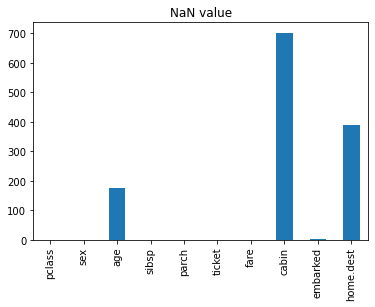

In [12]:
X_train.isna().sum().plot.bar()
plt.title('NaN value')
plt.show()

     sex survived
501    1        1
588    1        1
402    1        1
1193   0        0
686    1        1
...   ..      ...
763    1        1
835    0        0
1216   1        1
559    1        1
684    1        0

[916 rows x 2 columns]


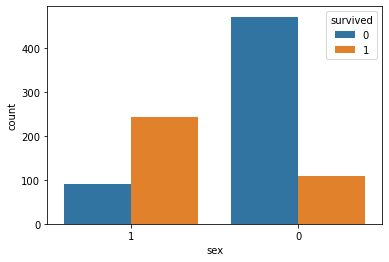

         fare survived
501   19.5000        1
588   23.0000        1
402   13.8583        1
1193   7.7250        0
686    7.7250        1
...       ...      ...
763   20.5750        1
835    8.0500        0
1216   7.7333        1
559   36.7500        1
684   15.5000        0

[916 rows x 2 columns]


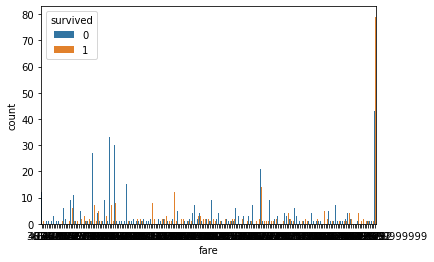

In [49]:
# concat ->  데이터 행 연결, axis 옵션을 주면 옆으로 붙일 수 있다.
d = pd.concat([X_train.sex, y_train], axis=1)
print(d)
# countplot -> 각 행별로 데이터가 얼마나 있는지 표시
sns.countplot(data=d, x='sex', hue='survived')
plt.show()

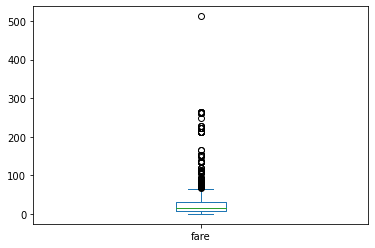

In [14]:
X_train.fare.plot.box()
plt.show()

### 데이터 전처리
검증, 평가 데이터셋에도 **"동일"**한 전처리를 수행해줘야 함

이상치 처리

In [15]:
# 통계적인 상위 이상치 -> 3분위수 + 1.5*(3분위수 - 1분위수)
upper = X_train.fare.quantile(.75) + 1.5*(X_train.fare.quantile(.75) - X_train.fare.quantile(.25))
print(upper)

66.34379999999999


In [16]:
# clip -> 하한값, 상한값을 대체
X_train.fare = X_train.fare.clip(upper=upper)

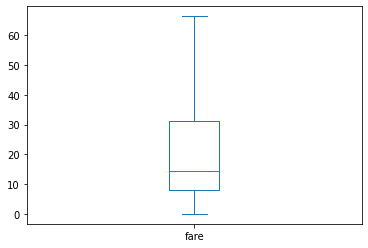

         fare survived
501   19.5000        1
588   23.0000        1
402   13.8583        1
1193   7.7250        0
686    7.7250        1
...       ...      ...
763   20.5750        1
835    8.0500        0
1216   7.7333        1
559   36.7500        1
684   15.5000        0

[916 rows x 2 columns]


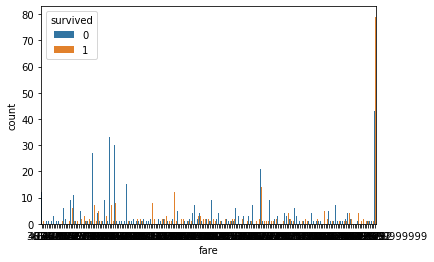

In [50]:
X_train.fare.plot.box()
plt.show()

f = pd.concat([X_train.fare, y_train], axis=1)
print(f)
sns.countplot(data=f, x='fare', hue='survived')
plt.show()

In [18]:
# test 데이터셋에도 동일한 전처리 수행
X_test.fare = X_test.fare.clip(upper=upper)

결측값 처리

In [19]:
# mean -> 평균값, mode -> 최빈값
X_train['age'] = X_train['age'].fillna(X_train.age.mean())
X_train['cabin'] = X_train['cabin'].fillna(X_train.cabin.mode())
X_train['embarked'] = X_train['embarked'].fillna(X_train.embarked.mode())
X_train['home.dest'] = X_train['home.dest'].fillna('결측치')
X_train

,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
501,2.0,female,13.000000,0.0,1.0,250644,19.5000,NaN,S,"England / Bennington, VT"
588,2.0,female,4.000000,1.0,1.0,29103,23.0000,NaN,S,"Cornwall / Akron, OH"
402,2.0,female,30.000000,1.0,0.0,SC/PARIS 2148,13.8583,NaN,C,"Barcelona, Spain / Havana, Cuba"
1193,3.0,male,30.231444,0.0,0.0,36209,7.7250,NaN,Q,결측치
686,3.0,female,22.000000,0.0,0.0,334914,7.7250,NaN,Q,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."
...,...,...,...,...,...,...,...,...,...,...
763,3.0,female,0.166700,1.0,2.0,C.A. 2315,20.5750,NaN,S,"Devon, England Wichita, KS"
835,3.0,male,30.231444,0.0,0.0,376563,8.0500,NaN,S,결측치
1216,3.0,female,30.231444,0.0,0.0,335432,7.7333,NaN,Q,결측치
559,2.0,female,20.000000,0.0,0.0,C.A. 33112,36.7500,NaN,S,"Cornwall / Hancock, MI"


In [20]:
X_test['age'] = X_test.age.fillna(X_train.age.mean())
X_test['fare'] = X_test.fare.fillna(X_train.fare.mean())
X_test['cabin'] = X_test.cabin.fillna(X_train.cabin.mode())
X_test['embarked'] = X_test.embarked.fillna(X_train.embarked.mode())
X_test['home.dest'] = X_test['home.dest'].fillna('결측치')

범주형 변수 처리

In [22]:
X_train['sex'] = X_train['sex'].replace(['male', 'female'], [0, 1])
X_test['sex'] = X_test['sex'].replace(['male', 'female'], [0, 1])

# a.get(x,y) -> 딕셔너리 a에서 키값 a에 해당하는 값을 돌려준다. 키값이 없을 경우 y를 반환한다. 

value2idx = {x:i for i, x in enumerate(X_train.ticket.unique())}
X_train['ticket'] = X_train['ticket'].map(lambda x: value2idx[x])
X_test['ticket'] = X_test['ticket'].map(lambda x: value2idx.get(x,-1))

value2idx = {x:i for i, x in enumerate(X_train.cabin.unique())}
X_train['cabin'] = X_train['cabin'].map(lambda x: value2idx[x])
X_test['cabin'] = X_test['cabin'].map(lambda x: value2idx.get(x, -1))

value2idx = {x:i for i, x in enumerate(X_train.embarked.cat.categories)}
X_train['embarked'] = X_train['embarked'].map(lambda x: value2idx[x])
X_test['embarked'] = X_test['embarked'].map(lambda x: value2idx.get(x, -1))

value2idx = {x:i for i, x in enumerate(X_train['home.dest'].unique())}
X_train['home.dest'] = X_train['home.dest'].map(lambda x: value2idx[x])
X_test['home.dest'] = X_test['home.dest'].map(lambda x: value2idx.get(x, -1))

X_train

,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
501,2.0,1,13.000000,0.0,1.0,0,19.5000,0,2,0
588,2.0,1,4.000000,1.0,1.0,1,23.0000,0,2,1
402,2.0,1,30.000000,1.0,0.0,2,13.8583,0,0,2
1193,3.0,0,30.231444,0.0,0.0,3,7.7250,0,1,3
686,3.0,1,22.000000,0.0,0.0,4,7.7250,0,1,4
...,...,...,...,...,...,...,...,...,...,...
763,3.0,1,0.166700,1.0,2.0,98,20.5750,0,2,51
835,3.0,0,30.231444,0.0,0.0,696,8.0500,0,2,3
1216,3.0,1,30.231444,0.0,0.0,697,7.7333,0,1,3
559,2.0,1,20.000000,0.0,0.0,296,36.7500,0,2,159


### feature 생성

In [39]:
# feature 생성 예시
# str(x)[number] -> x를 문자형으로 바꾸고 number번째 문자 인덱싱

X_train['나이대'] = X_train['age'].map(lambda x: str(x)[0]+'0대')

value2idx = {x:i for i, x in enumerate(X_train['나이대'].unique())}
# 딕셔너리 형태로 for문 루프,  unique 함수로 뽑아낸 '00대'꼴이 x이고 인덱스번호가 i임.
X_train['나이대'] = X_train['나이대'].map(lambda x: value2idx[x])
# '00대'꼴을 하나씩 돌려서 인덱스번호를 추출해 X_train 나이대 칼럼에 집어넣음.

X_test['나이대'] = X_test['age'].map(lambda x: str(x)[0]+'0대')

value2idx = {x:i for i, x in enumerate(X_test['나이대'].unique())}
X_test['나이대'] = X_test['나이대'].map(lambda x: value2idx[x])

In [47]:
X_train.fare.value_counts()

66.3438    122
13.0000     42
7.7500      40
8.0500      38
26.0000     35
          ... 
9.3250       1
27.0000      1
7.5792       1
5.0000       1
8.6833       1
Name: fare, Length: 197, dtype: int64

        요금구간 survived
501    Cheap        1
588   Middle        1
402    Cheap        1
1193   Cheap        0
686    Cheap        1
...      ...      ...
763    Cheap        1
835    Cheap        0
1216   Cheap        1
559   Middle        1
684    Cheap        0

[916 rows x 2 columns]


C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


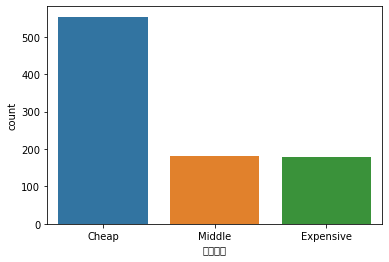

In [84]:
### 과제: feature를 생성하여 모델의 성능을 높이시오.
def get_category(fare):
    cat = ''
    if fare <= -1: cat = 'Unknown'
    elif fare <= 22: cat = 'Cheap'
    elif fare <= 44: cat = 'Middle'
    else : cat = 'Expensive'
    
    return cat

group_names = ['Unknown', 'Cheap', 'Middle', 'Expensive']

X_train['요금구간'] = X_train['fare'].apply(lambda x : get_category(x))
s = pd.concat([X_train['요금구간'], y_train], axis=1)
print(s)
sns.countplot(data=s, x='요금구간')
plt.show()

In [85]:
X_train

,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,나이대,요금구간
501,2.0,1,13.000000,0.0,1.0,0,19.5000,0,2,0,0,Cheap
588,2.0,1,4.000000,1.0,1.0,1,23.0000,0,2,1,1,Middle
402,2.0,1,30.000000,1.0,0.0,2,13.8583,0,0,2,2,Cheap
1193,3.0,0,30.231444,0.0,0.0,3,7.7250,0,1,3,2,Cheap
686,3.0,1,22.000000,0.0,0.0,4,7.7250,0,1,4,3,Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...
763,3.0,1,0.166700,1.0,2.0,98,20.5750,0,2,51,4,Cheap
835,3.0,0,30.231444,0.0,0.0,696,8.0500,0,2,3,2,Cheap
1216,3.0,1,30.231444,0.0,0.0,697,7.7333,0,1,3,2,Cheap
559,2.0,1,20.000000,0.0,0.0,296,36.7500,0,2,159,3,Middle


### 모델 학습

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train) # 모델 학습

RandomForestClassifier(random_state=0)

### 모델 평가

In [64]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [65]:
model.predict(X_test) # 클래스 예측

array(['0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0',
       '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1',
       '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0',
       '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1',
       '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0',
       '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0',
       '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1

In [66]:
model.predict_proba(X_test) # 각 클래스의 확률 예측

array([[0.73, 0.27],
       [0.02, 0.98],
       [0.89, 0.11],
       [0.99, 0.01],
       [0.88, 0.12],
       [0.3 , 0.7 ],
       [0.58, 0.42],
       [0.46, 0.54],
       [0.65, 0.35],
       [0.85, 0.15],
       [0.69, 0.31],
       [0.6 , 0.4 ],
       [0.53, 0.47],
       [0.55, 0.45],
       [0.03, 0.97],
       [0.74, 0.26],
       [0.13, 0.87],
       [0.48, 0.52],
       [0.21, 0.79],
       [0.8 , 0.2 ],
       [0.62, 0.38],
       [0.92, 0.08],
       [0.75, 0.25],
       [0.06, 0.94],
       [0.53, 0.47],
       [0.12, 0.88],
       [0.58, 0.42],
       [0.79, 0.21],
       [0.95, 0.05],
       [0.4 , 0.6 ],
       [0.48, 0.52],
       [0.02, 0.98],
       [0.09, 0.91],
       [0.57, 0.43],
       [0.14, 0.86],
       [0.76, 0.24],
       [0.77, 0.23],
       [0.79, 0.21],
       [0.8 , 0.2 ],
       [0.73, 0.27],
       [0.81, 0.19],
       [0.6 , 0.4 ],
       [0.89, 0.11],
       [0.44, 0.56],
       [0.48, 0.52],
       [0.97, 0.03],
       [0.8 , 0.2 ],
       [0.12,

In [67]:
preds = model.predict(X_test)
acc_score = accuracy_score(y_test, preds) # 성능 측정 (정확도)

probas = model.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, probas) # 성능 측정 (ROC_AUC)

print('Accuracy:\t', acc_score)
print('ROC_AUC:\t', auc_score)

Accuracy:	 0.8015267175572519
ROC_AUC:	 0.8430673082241027
